In [134]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [135]:
df=pd.read_csv('data/imdb_scraped.csv')

In [136]:
df.head(3)

,Unnamed: 0,Title,Year,Genre,Director,Cast,Movie_id
0,0,Aama,(1964),"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
1,1,Maitighar,(1966),"Drama, Musical",B.S. Thapa\n |,"['Mala Sinha', 'Chidambar Prasad Lohani', 'Tik...",/title/tt7051562/
2,2,Hijo Aaja Bholi,(1968),Drama,Hira Singh Khatri\n |,"['Basundhara Bhusal', 'Bhubhan Chand', 'Shreed...",/title/tt8378014/


In [137]:
df=df.drop(columns='Unnamed: 0')

### NULL Values

In [138]:
df.isnull().sum()

Title        0
Year        16
Genre       76
Director    12
Cast         0
Movie_id     0
dtype: int64

In [139]:
df=df[~(df['Year']=='Notes')]

In [140]:
df['Year'].value_counts()

Year
(2018)          58
(2019)          52
(2017)          39
(2016)          39
(2022)          36
                ..
(III) (2013)     1
(II) (2014)      1
(I) (2015)       1
(IV) (2016)      1
(I)              1
Name: count, Length: 77, dtype: int64

### Cleaning year column

In [141]:
df['Year'].unique()

array(['(1964)', '(1966)', '(1968)', '(1971)', '(1973)', '(1977)',
       '(1978)', '(1980)', '(1981)', '(1982)', '(1983)', '(1984)',
       '(1985)', '(1987)', '(1989)', '(1990)', '(1991)', '(1993)',
       '(1994)', '(1995)', '(1996)', '(1997)', '(1998)', '(1999)',
       '(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)', '(2003)',
       '(2004)', '(2005)', '(2006)', '(2007)', '(2008)', '(2009)',
       '(2010)', '(V) (2010)', '(2011)', '(II) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(II) (2013)', '(III) (2013)', '(2014)',
       '(II) (2014)', '(I) (2015)', '(2015)', '(2016)', '(IV) (2016)',
       '(III) (2016)', '(I) (2016)', '(II) (2016)', '(VI) (2016)',
       '(I) (2017)', '(2017)', '(III) (2017)', '(2018)', '(VII) (2018)',
       '(I) (2018)', '(II) (2018)', '(2019)', '(I) (2019)', '(V) (2019)',
       '(2020)', '(I) (2020)', '(2021)', '(VI) (2021)', '(2022)',
       '(II) (2022)', '(2023)', '(I) (2023)', '(II) (2023)', '(2024)',
       nan, '(III)', '(I)'], d

In [142]:
pattern=r'\((\d{4})\)'

In [143]:
def extract_year(s):
    match = re.search(pattern, s)
    if match:
        return match.group(1)
    else:
        return None

In [144]:
df['Year']=df['Year'].astype('str').apply(extract_year)
# df['Year'].astype('int')

In [145]:
df['Year']

0      1964
1      1966
2      1968
3      1971
4      1973
       ... 
645    None
646    None
647    None
648    None
649    None
Name: Year, Length: 650, dtype: object

In [146]:
df=df[~df['Year'].isnull()]

### Cleaning movie names

In [147]:
df['Title']=df['Title'].str.lower()

In [148]:
df['Title'].unique()

array(['aama', 'maitighar', 'hijo aaja bholi', 'parivartan',
       'man ko bandh', 'kumari', 'paral ko aago', 'sindoor',
       'raiders of the lost ark', 'bansuri', 'jeevan rekha', 'samjhana',
       'kanchi', 'basudev', 'kusume rumal', 'saino', 'anyay', 'santan',
       'cheli beti', 'lahure', 'behuli', 'maya preeti', 'bhagya rekha',
       'pachhis basanta', 'lobhi papi', 'bijay parajay', 'kanyadaan',
       'yug dekhi yug samma', 'chino', 'aadhi beri', 'dakshina', 'deuta',
       'dui thopa aansu', 'sapana', 'sauta', 'adhikar', 'mahadevi',
       'mohani', 'swarga', 'janma janma', 'prithvi', 'shree swosthani',
       'sannani', 'mahamaya', 'prem pinda', 'jeevan sangharsha', 'ragat',
       'saraswati', 'janma bhoomi', 'rahar', 'gothalo', 'seemana',
       'bhariya', 'chunauti', 'raanko', 'simarekha', 'balidaan',
       'karodpati', 'shankar', 'naso', 'saathi', 'allare',
       'aadi kabi bhanubhakta', 'thuldai', 'nepali babu', 'afanta',
       'nata ragat ko', 'yo maya ko sagar', 

In [149]:
movie_counts=df['Title'].value_counts()

In [150]:
movies_more_than_once = movie_counts[movie_counts > 1].index.values

In [151]:
df[df['Title'].isin(movies_more_than_once)]

,Title,Year,Genre,Director,Cast,Movie_id
0,aama,1964,"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
527,aama,2020,Drama,Dipendra K. Khanal\n |,"['Narendra Singh Dhami', 'Sarita Giri', 'Deshb...",/title/tt12320684/
603,aincho paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549224/
610,aincho paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549232/


In [152]:
df=df.drop([527,603,574])

In [153]:
nepali_to_english={
    'ए मेरो हजुर ४':'a mero hajur 4',
    'प्रेम गीत ३':'prem geet 3',
    'कबड्डी ४':'kabaddi 4',
    'कबड्डी':'kabaddi',
    'म यस्तो गीत गाउछु':'ma yesto geet gauchu',
    'पाहुना':'pahuna',
    'सेतो सुर्य':'white sun',
    'जय हो':'jai ho'
}

In [154]:
for key, value in nepali_to_english.items():
    df['Title'] = df['Title'].str.replace(key, value)


In [155]:
df.shape

(629, 6)

**Cleaning Director name**

In [156]:
df['Director']

0      Hira Singh Khatri\n                 |
1             B.S. Thapa\n                 |
2      Hira Singh Khatri\n                 |
3      Hira Singh Khatri\n                 |
4          Prakash Thapa\n                 |
                       ...                  
627          Santosh Sen\n                 |
628                            Niren Shresth
629     Ramesh Mk Poudel\n                 |
630    Narayan Rayamajhi\n                 |
631           Kumud Pant\n                 |
Name: Director, Length: 629, dtype: object

In [157]:
df['Director'] = df['Director'].str.replace('\n', '').str.replace('|', '').str.lower()


In [158]:
df[df['Director'].isnull()]

,Title,Year,Genre,Director,Cast,Movie_id
74,apsara,2000,NaN,NaN,"['Sanchita Luitel', 'Bipana Thapa', 'Ramesh Up...",/title/tt0342048/
94,yo kasto saino,2001,NaN,NaN,[''],/title/tt0314925/
100,maya ko saino,2001,NaN,NaN,[''],/title/tt0304388/
102,manai ta ho,2001,NaN,NaN,[''],/title/tt0304376/
107,mitini,2002,Drama,NaN,"['Shivahari Poudel', 'Uttam Pradhan', 'Dilip R...",/title/tt0314385/
110,maya namara,2002,NaN,NaN,"['Sohail Bisht', 'Sanjeev Bisht', 'Ramit Dhung...",/title/tt0314362/
114,santan ko maya,2002,NaN,NaN,[''],/title/tt0314611/
136,yastai rahecha jindagi,2002,NaN,NaN,[''],/title/tt0314917/
150,soltini,2005,"Action, Romance",NaN,[''],/title/tt1039910/
244,loafer,2013,Action,NaN,"['Dayahang Rai', 'Anupam Sharma', 'Aaryan Sigd...",/title/tt27004829/


In [159]:
# df['Director'].value_counts().values

In [160]:
df[df['Title']=='lalteen']

,Title,Year,Genre,Director,Cast,Movie_id
406,lalteen,2017,"Action, Drama",NaN,"['Keki Adhikari', 'Janak Bartaula', 'Shishir B...",/title/tt6695976/


In [161]:
new_row=df[df['Title']=='lalteen']

In [162]:
new_row['Director']='dev kumar shrestha'

C:\Users\sunne\AppData\Local\Temp\ipykernel_8420\3593642516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row['Director']='dev kumar shrestha'


In [163]:
df=df[~df['Director'].isnull()]

In [164]:
df = pd.concat([df, new_row], ignore_index=True)

In [165]:
df[df['Director'].isnull()]

,Title,Year,Genre,Director,Cast,Movie_id


### Cleaning cast 

In [166]:
df['Cast'].value_counts()

Cast
['tor:\nPranitAcharjuNewar\n                 | \n    Star:\nPranitAcharjuNewar']    3
['Gauri Malla']                                                                     2
['Kusum Gurung', 'Ayub Sen', 'Saruk Tamrakar', 'Aaslesha Thakuri']                  1
['Sunil Thapa', 'Karma Shakya', 'Menuka Pradhan', 'Rabindra Jha']                   1
['Anmol K.C.', 'Aditi Budhathoki', 'Anoop Bikram Shahi', 'Kameshwor Chaurasiya']    1
                                                                                   ..
['Ramesh Adhikari', 'Kabita Ale', 'Anita Dahal', 'Ritika Lama']                     1
['Arpan Thapa', 'Samuna K.C', 'Dhurba Koirala', 'Kamala Regmi']                     1
['Niraj Baral', 'Priyanka Karki', 'Pooja Sharma', 'Devu Shrestha']                  1
['Madan Baral', 'Manju Devkota', 'Sunil Pokharel', 'Mahesh Shrestha']               1
['Keki Adhikari', 'Janak Bartaula', 'Shishir Bhandari', 'Ram Keshari Bogati']       1
Name: count, Length: 615, dtype: int64

In [167]:
def find_no_of_cast(cast):
    cast=cast[1:-1].split(',')
    return len(cast)


In [168]:
df['cast_no']=df['Cast'].apply(find_no_of_cast)

In [169]:
df['Cast']=df["Cast"].str.strip("[]")
df=df[~df["Cast"].str.contains('tor:', case=False, na=False)]

In [170]:
cast_no_counts=df['cast_no'].value_counts()

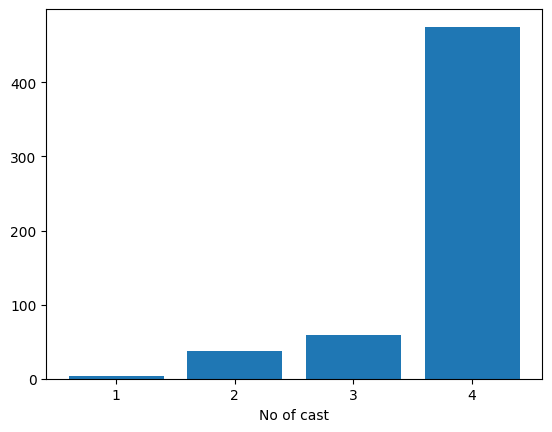

In [171]:
plt.bar(cast_no_counts.index,cast_no_counts.values)
plt.xticks(cast_no_counts.index)
plt.xlabel('No of cast')
plt.show()

In [172]:
df['Cast']=df['Cast'].str.lower()

In [173]:
df[df['Cast']=="['']"]

,Title,Year,Genre,Director,Cast,Movie_id,cast_no


### Genres

In [174]:
df['Genre']=df['Genre'].str.lower()

In [175]:
genre_counts=df['Genre'].value_counts()

In [176]:
genre_counts

Genre
drama                          192
romance                         50
drama, romance                  46
comedy                          27
action                          24
                              ... 
animation, biography, drama      1
comedy, drama, family            1
action, comedy, romance          1
comedy, drama, sci-fi            1
biography, drama, history        1
Name: count, Length: 76, dtype: int64

In [177]:
genres=[]
for genre, count in genre_counts.items():
    # print(f'Genre: {genre}, Count: {count}')
    genres.extend(genre.split(','))
    

In [178]:
genres=[genre.strip() for genre in genres]
genres=set(genres)
genres=list(genres)

In [179]:
len(genres)

19

In [180]:
with open('genres.txt','w') as genres_file:
    for genre in genres:
        genres_file.write(genre+ '\n')
     

In [181]:
df[df['Genre'].isnull()].shape

(50, 7)

In [182]:
movies_to_keep=['aafno manchhe','yug dekhi yug samma','sauta','prithvi','shankar','allare','afanta','nata ragat ko','yo maya ko sagar','aago','maya baiguni','aafno manchhe','buhari','aashirbad','siudo ko sindoor','jeevan saathi','daag','afno ghar afno manche','pijanda','muskan','mero hajur','mr. mangale','krodh']

In [183]:
# ids=df[df['Genre'].isnull()]['Movie_id'].values
# titles=df[df['Genre'].isnull()]['Title'].values
# for id,title in zip(ids,titles) :
#     print(f'{title} : https://www.imdb.com{id}')

In [184]:
df=df[df["Genre"].notna() | df["Title"].isin(movies_to_keep)]

In [185]:
df['Genre']=df['Genre'].fillna('drama')

In [186]:
df.to_csv('data/cleaned_data.csv')